<H1>Лабораторна робота 1</H1>

In [8]:
#імпортуємо необхідні бібліотеки
import numpy as np
import matplotlib.pyplot as plt

<H2>Частина 1</H2>

Завдання 1

In [92]:
#функція, яка додає шум
def add_noise(x, d = 0.25):
    return x + d * np.random.randn(*x.shape)

In [57]:
#задаємо параметри розподілу
k = 1.5
b = 2
start = 0
end = 5
#генеруємо дані
x = np.random.uniform(0, 5, (100))
y = k*x + b
y = add_noise(y)

Text(0, 0.5, 'Y')

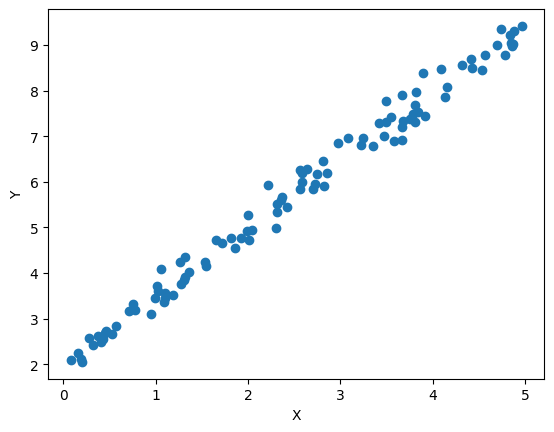

In [58]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')

Завдання 2

In [61]:
k_estimate = np.sum((x - np.mean(x))*(y - np.mean(y)))/np.sum((x - np.mean(x))**2)
b_estimate = np.mean(y) - k_estimate * np.mean(x)
print('оцінка k:', k_estimate)
print('оцінка b:', b_estimate)
print(f'оцінка y: y = {k_estimate}x + {b_estimate}')

оцінка k: 1.4805692567450126
оцінка b: 2.026879279937393
оцінка y: y = 1.4805692567450126x + 2.026879279937393


Завдання 3

In [93]:
numpy_fit = np.polyfit(x, y, 1)
print(numpy_fit)

[1.48056926 2.02687928]


Значення, отримані за допомогою numpy, є такими самими, як отримані за допомогою формули та дуже близькими до реальних

Завдання 4

In [77]:
def my_estimate(x):
    return k_estimate * x + b_estimate

def numpy_estimate(x):
    return numpy_fit[0]*x + numpy_fit[1]

def real_y(x):
    return k*x + b

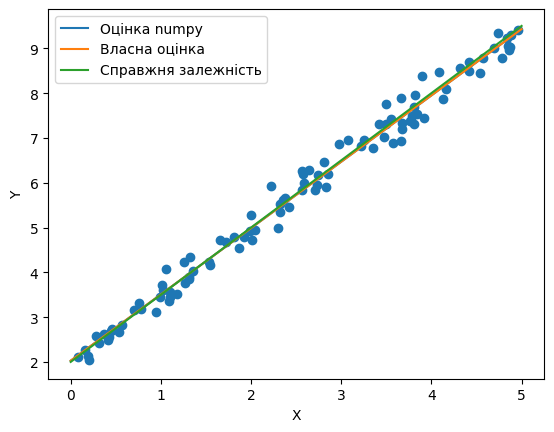

In [81]:
plot_x = np.array([start, end])
plt.plot(plot_x, numpy_estimate(plot_x), label='Оцінка numpy')
plt.plot(plot_x, my_estimate(plot_x), label='Власна оцінка')
plt.plot(plot_x, real_y(plot_x), label='Справжня залежність')
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

<H2>Частина 2</H2>

Завдання 1

In [101]:
def gradient_descent(x, y, lr=0.1, iteration_number=200):
    losses = []
    b0 = 1
    b1 = 0.5
    n = x.shape[0]
    for i in range(iteration_number):
        y_estimate = b0 + b1 * x
        loss = np.sum((y - y_estimate)**2) / n
        losses.append(loss)
        d_b0 = -2*(np.sum(y - y_estimate))/n
        d_b1 = -2*(np.sum(x*(y - y_estimate)))/n
        b0 -= lr*d_b0
        b1 -= lr*d_b1
    return b1, b0, losses

In [102]:
k_gradient, b_gradient, losses = gradient_descent(x, y)
print('оцінка k:', k_gradient)
print('оцінка b:', b_gradient)
print(f'оцінка y: y = {k_gradient}x + {b_gradient}')

оцінка k: 1.4805875933827197
оцінка b: 2.026819852471221
оцінка y: y = 1.4805875933827197x + 2.026819852471221


Отримані оцінки також близькі до реальних значень параметрів

Завдання 2

In [90]:
def gradient_estimate(x):
    return k_gradient*x + b_gradient

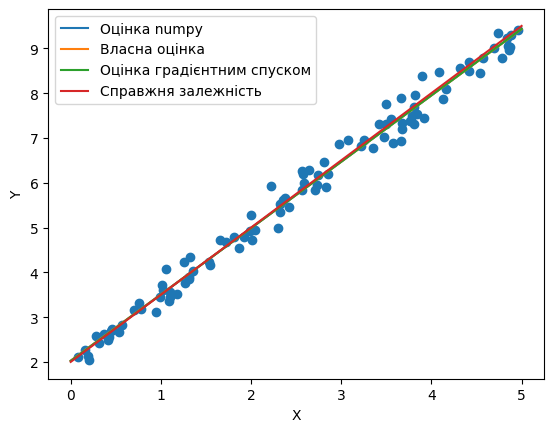

In [91]:
plot_x = np.array([start, end])
plt.plot(plot_x, numpy_estimate(plot_x), label='Оцінка numpy')
plt.plot(plot_x, my_estimate(plot_x), label='Власна оцінка')
plt.plot(plot_x, gradient_estimate(plot_x), label='Оцінка градієнтним спуском')
plt.plot(plot_x, real_y(plot_x), label='Справжня залежність')
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

Завдання 3

Text(0, 0.5, 'Похибка')

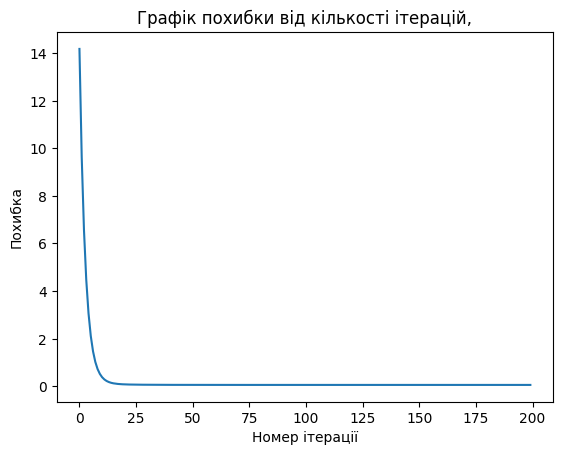

In [104]:
plt.plot(range(len(losses)), losses)
plt.title('Графік похибки від кількості ітерацій,')
plt.xlabel('Номер ітерації')
plt.ylabel('Похибка')

Похибка зменьшується монотонно. На початку навчання похибка зменшується швидше

Завдання 4

Оцінки, отримані методом градієнтного спуску є кращими, оскільки є ближчими до реальних параметрів розподілу